<a href="https://colab.research.google.com/github/JackDeBuff/ThaiCovidForecasting/blob/master/CovidThaiForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import os
import urllib.request
from datetime import date, timedelta

today = date.today()
yesterday = today - timedelta(days=1)
print("date: " + str(yesterday))
urllib.request.urlretrieve('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-' + str(yesterday) + '.xlsx','data.xlsx')
os.listdir()

date: 2020-03-22


['.config', 'data.xlsx', 'data.csv', 'sample_data']

In [0]:
import xlrd
import csv

def csv_from_excel():
    wb = xlrd.open_workbook('data.xlsx')
    sh = wb.sheet_by_name('COVID-19-geographic-disbtributi')
    data = open('data.csv', 'w')
    wr = csv.writer(data, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    data.close()

# runs the csv_from_excel function:
csv_from_excel()

In [133]:
import pandas as pd
raw_dataset = pd.read_excel('data.xlsx', 
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,2020-03-22,22,3,2020,0,0,Afghanistan,AF
1,2020-03-21,21,3,2020,2,0,Afghanistan,AF
2,2020-03-20,20,3,2020,0,0,Afghanistan,AF
3,2020-03-19,19,3,2020,0,0,Afghanistan,AF
4,2020-03-18,18,3,2020,1,0,Afghanistan,AF


In [0]:
def makelist(country):
  x = dataset.loc[dataset['Countries and territories'] == country]
  sum = 0
  lis = []
  lis2 = []
  for index,row in x.iterrows():
      lis.append(int(row[4]))
  for i in reversed(lis):
      sum = sum + int(i)
      if sum > 99:
        lis2.append(sum)
  return lis2

[[216, 235, 386, 526, 623, 882, 1323, 1988, 2775, 4528, 5994, 7734, 9714, 11809, 14399, 17211, 20448, 24320, 28047, 31207, 34625, 37232, 40206, 42696, 44724, 59865, 64021, 66559, 68566, 70618, 72508, 74258, 74652, 75543, 76369, 77016, 77234, 77749, 78159, 78598, 78927, 79355, 79929, 80134, 80261, 80380, 80497, 80667, 80768, 80814, 80859, 80879, 80908, 80932, 80954, 80973, 80995, 81020, 81130, 81163, 81238, 81337, 81416, 81499], [132, 229, 322, 400, 650, 888, 1128, 1689, 1835, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 15113, 17660, 17750, 23980, 27980, 31506, 35713, 41035, 47021, 53578], [103, 125, 159, 233, 338, 433, 554, 754, 1025, 1312, 1663, 2174, 2951, 3774, 4661, 6427, 9415, 14250, 19624, 26747], [114, 151, 200, 261, 374, 430, 589, 1204, 1639, 2140, 3004, 4231, 5753, 7753, 9191, 11178, 13716, 17147, 19980, 24926], [111, 129, 157, 196, 262, 400, 684, 847, 902, 1139, 1296, 1567, 2369, 3062, 3795, 4838, 6012, 7156, 8198, 14138, 18187, 21463], [139, 245, 388, 593, 978, 1

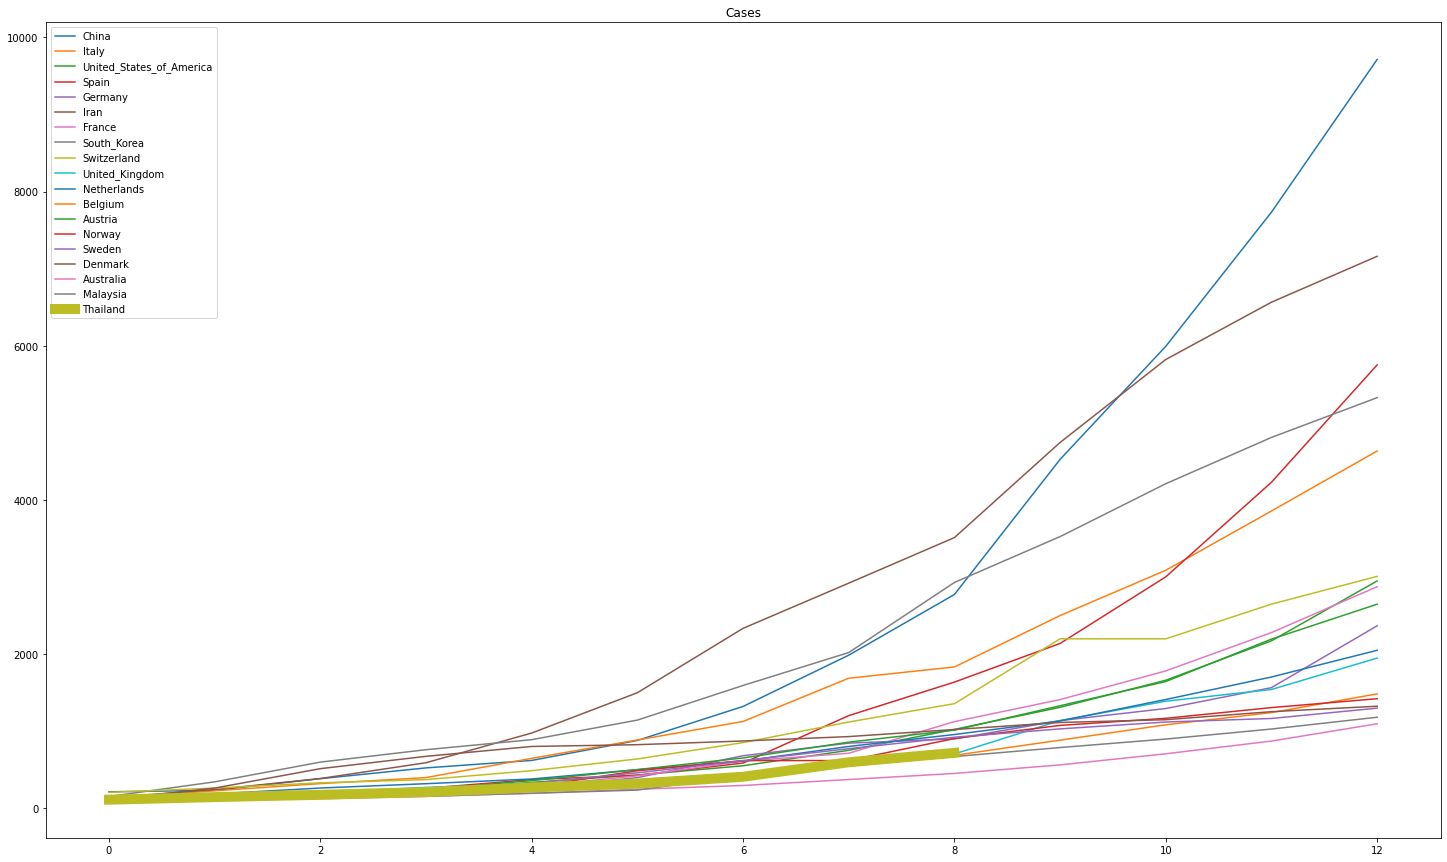

In [137]:
import matplotlib.pyplot as plt
countrylist = ['China','Italy','United_States_of_America','Spain','Germany','Iran','France','South_Korea','Switzerland','United_Kingdom','Netherlands','Belgium',
               'Austria','Norway','Sweden','Denmark','Australia','Malaysia','Thailand']
plt.figure(figsize=(25,15))
plt.title('Cases')


y = []
for country in countrylist[:-1]:
  y.append(makelist(country))
print(y)

minlen = min(map(len, y))

count = 0
for i in y:
  plt.plot(i[:minlen],label=countrylist[count])
  count+=1

x = [114,147,177,212,272,322,411,599,721]
plt.plot(x[:13],linewidth=10,label='Thailand')
y.append(x)

plt.legend(loc='upper left')
plt.show()